In [1]:
import warnings
import numpy as np
import pandas as pd
from helper import display_data # This function help us to display the first 5 data points
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

import seaborn as sns # seaborn will beautify our plots from matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
sns.set_context('notebook')
sns.set_style('dark')

# This is used for ignoring a harmless warning from the *scipy* package
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [2]:
data = np.loadtxt('data/ex2data2.txt', delimiter=',')
display_data(data)

array([[ 0.051267,  0.69956 ,  1.      ],
       [-0.092742,  0.68494 ,  1.      ],
       [-0.21371 ,  0.69225 ,  1.      ],
       [-0.375   ,  0.50219 ,  1.      ],
       [-0.51325 ,  0.46564 ,  1.      ]])

In [3]:
# pandas can give us a better visualization on tabular data.
df = pd.DataFrame(data, columns=['Test 1', 'Test 2', 'Result'])
df.head()

,Test 1,Test 2,Result
0,0.051267,0.69956,1.0
1,-0.092742,0.68494,1.0
2,-0.213710,0.69225,1.0
3,-0.375000,0.50219,1.0
4,-0.513250,0.46564,1.0


In [4]:
X = data[:,0:2]
display_data(X)

array([[ 0.051267,  0.69956 ],
       [-0.092742,  0.68494 ],
       [-0.21371 ,  0.69225 ],
       [-0.375   ,  0.50219 ],
       [-0.51325 ,  0.46564 ]])

In [5]:
y = data[:,2]
display_data(y)

array([ 1.,  1.,  1.,  1.,  1.])

## Plot Data

In [6]:
def plotData(X, y, label_x, label_y, label_pos, label_neg):
    pos, neg = y == 1, y == 0
    plt.scatter(X[pos][:,0], X[pos][:,1], marker='+', c='k', s=50, linewidth=2, label=label_pos)
    plt.scatter(X[neg][:,0], X[neg][:,1], c='y', s=50, label=label_neg)
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.legend();

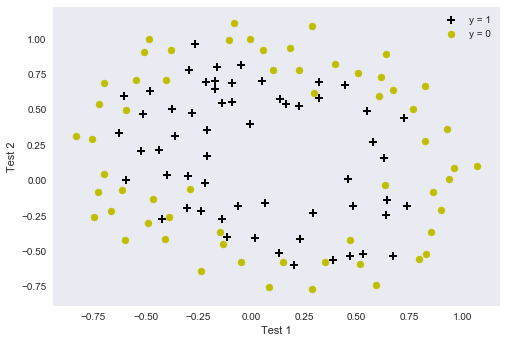

In [7]:
plotData(X, y, 'Test 1', 'Test 2', 'y = 1', 'y = 0')

In [8]:
poly = PolynomialFeatures(5)
poly_X = poly.fit_transform(X)
poly_X.shape

(118, 21)

In [9]:
lr = linear_model.LogisticRegression()

In [10]:
lr.fit(poly_X, y)
lr.coef_

array([[ 0.60298968,  0.59866921,  1.17963552, -2.10164228, -0.89110005,
        -1.46865193,  0.04449728, -0.36575411, -0.33806461, -0.29849711,
        -1.61579813, -0.04001355, -0.62141875, -0.2490159 , -1.38304095,
        -0.34793698, -0.21362518, -0.04436187, -0.28294347, -0.27865962,
        -0.65755559]])

In [11]:
h = .2
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.linspace(x_min, x_max), np.linspace(y_min, y_max))
Z = lr.predict(poly.fit_transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

score = lr.score(poly_X, y)
score

0.83050847457627119

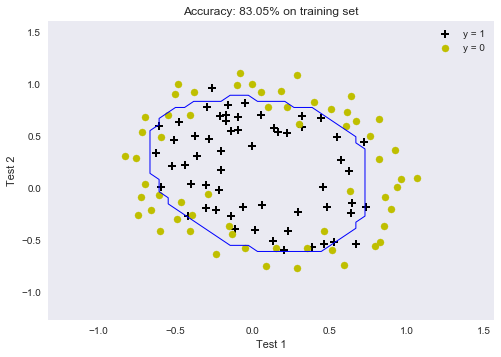

In [12]:
plt.contour(xx, yy, Z, [0.2], linewidths=1, colors='b');
plt.title('Accuracy: ' + str(score * 100)[:5] + "% on training set")
plotData(X, y, 'Test 1', 'Test 2', 'y = 1', 'y = 0')